In [1]:
import numpy as np
import pandas as pd

In [34]:
D4AI_list = pd.read_excel('Global_call_invite.xls')

In [3]:
D4AI_list.head()

,Name,Studio,Email,Notes,Call Lead,Unnamed: 5,Point on Postcard
0,Axel Unger,Munich,aunger@ideo.com,NaN,x,NaN,NaN
1,Andrea Rabinelli,Munich,arabinelli@ideo.com,NaN,NaN,NaN,NaN
2,David Sjunnesson,Munich,dsjunnesson@ideo.com,NaN,x,NaN,NaN
3,Katrin Klausecker,Munich,kklausecker@ideo.com,NaN,NaN,NaN,NaN
4,Jure Martinec,Munich,jmartinec@ideo.com,NaN,x,NaN,x


In [4]:
D4AI_list['number_of_meetings']=0
D4AI_list['max_meetings']=100
D4AI_list.head()

,Name,Studio,Email,Notes,Call Lead,Unnamed: 5,Point on Postcard,number_of_meetings,max_meetings
0,Axel Unger,Munich,aunger@ideo.com,NaN,x,NaN,NaN,0,100
1,Andrea Rabinelli,Munich,arabinelli@ideo.com,NaN,NaN,NaN,NaN,0,100
2,David Sjunnesson,Munich,dsjunnesson@ideo.com,NaN,x,NaN,NaN,0,100
3,Katrin Klausecker,Munich,kklausecker@ideo.com,NaN,NaN,NaN,NaN,0,100
4,Jure Martinec,Munich,jmartinec@ideo.com,NaN,x,NaN,x,0,100


In [5]:
leads = D4AI_list[D4AI_list['Call Lead']=='x']

In [6]:
leads['Studio'].value_counts()

San Francisco    5
Palo Alto        5
London           3
Munich           3
Cambridge        3
Tokyo            1
New York         1
Shanghai         1
Name: Studio, dtype: int64

In [7]:
studios = set(D4AI_list['Studio'].values)
studios

{'Cambridge',
 'London',
 'Munich',
 'New York',
 'Palo Alto',
 'San Francisco',
 'Shanghai',
 'Tokyo'}

In [8]:
hours_diff = pd.read_csv('time_zones.csv')
hours_diff

,Studio,hours_diff
0,Munich,7
1,London,6
2,Shanghai,13
3,Tokyo,14
4,Palo Alto,-2
5,San Francisco,-2
6,Cambridge,1
7,New York,1


In [9]:
(hours_diff['hours_diff'] + 9)%24

0    16
1    15
2    22
3    23
4     7
5     7
6    10
7    10
Name: hours_diff, dtype: int64

In [49]:
possible_groups = []

full_df = []

for i in range(24):
    times = (hours_diff['hours_diff'] + i)%24
    
    #get the ones that are within working hours
    working_hours_bool = (times>8) & (times<18)
    working_studios = hours_diff[working_hours_bool]
    working_studios['time'] = times[working_hours_bool]
#     print(working_studios)
#     print(' ')
    possible_groups.append(frozenset(working_studios['Studio']))
    full_df.append(working_studios)
print(possible_groups)

/Users/lisa/.pyenv/versions/paired-lunch/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


[frozenset({'Shanghai', 'Tokyo'}), frozenset({'Shanghai', 'Tokyo'}), frozenset({'Shanghai', 'Tokyo', 'Munich'}), frozenset({'Shanghai', 'Tokyo', 'London', 'Munich'}), frozenset({'Shanghai', 'London', 'Munich'}), frozenset({'London', 'Munich'}), frozenset({'London', 'Munich'}), frozenset({'London', 'Munich'}), frozenset({'New York', 'London', 'Cambridge', 'Munich'}), frozenset({'New York', 'London', 'Cambridge', 'Munich'}), frozenset({'New York', 'London', 'Cambridge', 'Munich'}), frozenset({'Cambridge', 'London', 'San Francisco', 'Palo Alto', 'New York'}), frozenset({'New York', 'Cambridge', 'San Francisco', 'Palo Alto'}), frozenset({'New York', 'Cambridge', 'San Francisco', 'Palo Alto'}), frozenset({'New York', 'Cambridge', 'San Francisco', 'Palo Alto'}), frozenset({'New York', 'Cambridge', 'San Francisco', 'Palo Alto'}), frozenset({'New York', 'Cambridge', 'San Francisco', 'Palo Alto'}), frozenset({'San Francisco', 'Palo Alto'}), frozenset({'San Francisco', 'Palo Alto'}), frozenset({

In [45]:
studio_pairings = set(possible_groups)

In [46]:
studio_pairings

{frozenset({'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'Cambridge', 'London', 'New York'}),
 frozenset({'Palo Alto', 'San Francisco'}),
 frozenset({'Cambridge', 'London', 'Munich', 'New York'}),
 frozenset({'London', 'Munich', 'Shanghai'}),
 frozenset({'Cambridge', 'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'Tokyo'}),
 frozenset({'Shanghai', 'Tokyo'}),
 frozenset({'London', 'Munich'})}

In [47]:
actual_groups = []
for group in studio_pairings:
    if len(group)>2:
        actual_groups.append(group)

In [48]:
actual_groups

[frozenset({'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'Cambridge', 'London', 'New York'}),
 frozenset({'Cambridge', 'London', 'Munich', 'New York'}),
 frozenset({'London', 'Munich', 'Shanghai'}),
 frozenset({'Cambridge', 'New York', 'Palo Alto', 'San Francisco'})]

In [15]:
mapping_dict = {}
# for group in actual_groups:
#     for entry in group:

for studio in studios:
    if studio not in mapping_dict:
        mapping_dict[studio] = []
    for group in actual_groups:
        if studio in group:
            group = np.array([stud for stud in group])
            group = group[group!=studio]
            current_list = mapping_dict[studio]
            for entry in group:
                current_list.append(entry)
            mapping_dict[studio] = current_list

In [16]:
poss = {}
for studio in mapping_dict:
    matches = mapping_dict[studio]
    possibilities = set(matches)
    poss[studio] = possibilities

In [17]:
poss

{'Cambridge': {'London', 'Munich', 'New York', 'Palo Alto', 'San Francisco'},
 'London': {'Cambridge',
  'Munich',
  'New York',
  'Palo Alto',
  'San Francisco',
  'Shanghai',
  'Tokyo'},
 'Munich': {'Cambridge', 'London', 'New York', 'Shanghai', 'Tokyo'},
 'New York': {'Cambridge', 'London', 'Munich', 'Palo Alto', 'San Francisco'},
 'Palo Alto': {'Cambridge', 'London', 'New York', 'San Francisco', 'Tokyo'},
 'San Francisco': {'Cambridge', 'London', 'New York', 'Palo Alto', 'Tokyo'},
 'Shanghai': {'London', 'Munich', 'Tokyo'},
 'Tokyo': {'London', 'Munich', 'Palo Alto', 'San Francisco', 'Shanghai'}}

In [18]:
actual_groups

[frozenset({'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'London', 'Munich', 'Shanghai'}),
 frozenset({'Cambridge', 'London', 'Munich', 'New York'}),
 frozenset({'Cambridge', 'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'London', 'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'Palo Alto', 'San Francisco', 'Tokyo'}),
 frozenset({'Cambridge', 'London', 'New York', 'Palo Alto', 'San Francisco'})]

In [19]:
from itertools import combinations

In [20]:
comb = set(combinations(studios, 3))
comb 

{('Cambridge', 'London', 'Munich'),
 ('Cambridge', 'London', 'New York'),
 ('Cambridge', 'London', 'Palo Alto'),
 ('Cambridge', 'London', 'San Francisco'),
 ('Cambridge', 'London', 'Shanghai'),
 ('Cambridge', 'London', 'Tokyo'),
 ('Cambridge', 'Munich', 'New York'),
 ('Cambridge', 'Munich', 'Palo Alto'),
 ('Cambridge', 'Munich', 'San Francisco'),
 ('Cambridge', 'Munich', 'Tokyo'),
 ('Cambridge', 'Palo Alto', 'New York'),
 ('Cambridge', 'San Francisco', 'New York'),
 ('Cambridge', 'San Francisco', 'Palo Alto'),
 ('Cambridge', 'San Francisco', 'Tokyo'),
 ('Cambridge', 'Shanghai', 'Munich'),
 ('Cambridge', 'Shanghai', 'New York'),
 ('Cambridge', 'Shanghai', 'Palo Alto'),
 ('Cambridge', 'Shanghai', 'San Francisco'),
 ('Cambridge', 'Shanghai', 'Tokyo'),
 ('Cambridge', 'Tokyo', 'New York'),
 ('Cambridge', 'Tokyo', 'Palo Alto'),
 ('London', 'Munich', 'New York'),
 ('London', 'Munich', 'Palo Alto'),
 ('London', 'Munich', 'San Francisco'),
 ('London', 'Munich', 'Tokyo'),
 ('London', 'Palo Alto'

In [33]:
actual_groups

[frozenset({'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'London', 'Munich', 'Shanghai'}),
 frozenset({'Cambridge', 'London', 'Munich', 'New York'}),
 frozenset({'Cambridge', 'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'London', 'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'Palo Alto', 'San Francisco', 'Tokyo'}),
 frozenset({'Cambridge', 'London', 'New York', 'Palo Alto', 'San Francisco'})]

In [21]:
# check if any of those are in the actual groups
good_groups = []
for entry in comb:
    entry = frozenset(entry)
    for group in actual_groups:
        if entry.issubset(group):
            good_groups.append(entry)
good_groups = set(good_groups)

In [22]:
good_groups

{frozenset({'Munich', 'Shanghai', 'Tokyo'}),
 frozenset({'New York', 'Palo Alto', 'San Francisco'}),
 frozenset({'London', 'Shanghai', 'Tokyo'}),
 frozenset({'Cambridge', 'Munich', 'New York'}),
 frozenset({'Cambridge', 'London', 'New York'}),
 frozenset({'London', 'Munich', 'New York'}),
 frozenset({'London', 'Munich', 'Shanghai'}),
 frozenset({'Cambridge', 'London', 'Palo Alto'}),
 frozenset({'Cambridge', 'London', 'San Francisco'}),
 frozenset({'Palo Alto', 'San Francisco', 'Tokyo'}),
 frozenset({'Cambridge', 'New York', 'San Francisco'}),
 frozenset({'London', 'New York', 'San Francisco'}),
 frozenset({'London', 'New York', 'Palo Alto'}),
 frozenset({'London', 'Munich', 'Tokyo'}),
 frozenset({'Cambridge', 'New York', 'Palo Alto'}),
 frozenset({'London', 'Palo Alto', 'San Francisco'}),
 frozenset({'Cambridge', 'Palo Alto', 'San Francisco'}),
 frozenset({'Cambridge', 'London', 'Munich'})}

In [23]:
leads = D4AI_list[D4AI_list['Call Lead']=='x']
weight = leads['max_meetings'] - leads['number_of_meetings']
selection = leads.sample(1, weights = weight)

selection_studio = selection.Studio.values[0]
selection_email = [selection.Email.values[0]]


In [24]:
leads = D4AI_list[D4AI_list['Call Lead']=='x']
weight = leads['max_meetings'] - leads['number_of_meetings']
selection = leads.sample(1, weights = weight)

selection_studio = selection.Studio.values[0]
selection_email = [selection.Email.values[0]]

possibilities = []
for group in good_groups:
    if selection_studio in group:
        possibilities.append(group)

In [25]:
import random
selected = []
while (sum(D4AI_list.number_of_meetings < 1) > 0):
    leads = D4AI_list[D4AI_list['Call Lead']=='x']
    weight = leads['max_meetings'] - leads['number_of_meetings']
    selection = leads.sample(1, weights = weight**5)

    selection_studio = selection.Studio.values[0]
    selection_email = [selection.index[0]]

   
    studio_group_index = random.randint(0, len(possibilities)-1)
    studio_group = possibilities[studio_group_index]
    other_studios = set(studio_group) - set([selection_studio])
    other_call_members = []
    for studio in other_studios:
        people = D4AI_list[((D4AI_list.Studio == studio) & (D4AI_list['Call Lead']!='x'))]
        weight = people['max_meetings'] - people['number_of_meetings']
        if sum(weight) == 0:
            people = D4AI_list[((D4AI_list.Studio == studio))]
            weight = people['max_meetings'] - people['number_of_meetings']
            # pick different studio grouping
            bad_studio_group_index = studio_group_index
            while studio_group_index == bad_studio_group_index:
                studio_group_index = random.randint(0, len(possibilities)-1)
                studio_group = possibilities[studio_group_index]
                other_studios = set(studio_group) - set([selection_studio])
                print('make new selection', other_studios)
                for studio in other_studios:
                    people = D4AI_list[((D4AI_list.Studio == studio) & (D4AI_list['Call Lead']!='x'))]
                    weight = people['max_meetings'] - people['number_of_meetings']
                
            
        selection = people.sample(1, weights = weight**7)
        selection_email.append(selection.index[0])
    print(selection_email)
    D4AI_list.loc[
                    selection_email, 'number_of_meetings'] += 1
    selected.append(selection_email)

[2, 68, 46, 33]
[26, 61, 69]
[29, 58, 50]
[2, 16, 69, 36]
[40, 54, 30]
[4, 55, 69, 32]
[27, 68, 16]
[0, 55, 69, 33]
[38, 68, 28]
[0, 16, 61, 33]
[19, 68, 43, 32]
[59, 70, 31]
[71, 66, 35]
[40, 11, 35]
[29, 68, 49]
[44, 57, 68, 33]
[17, 62, 42, 31]
[4, 61, 45, 30]
[26, 69, 46]
[17, 68, 35]
[27, 68, 15]
[26, 70, 15]
[38, 69, 30]
[34, 39, 16]
[53, 13, 70, 28]
[12, 39, 33]
[26, 70, 15]
[37, 15, 28]
[44, 23, 28]
[25, 46, 13]
[71, 67, 47, 36]
[29, 58, 41]
[19, 52, 41, 32]
[53, 16, 70, 36]
[34, 62, 47]
[44, 22, 31]
[71, 42, 28]
[4, 65, 69, 36]
[2, 61, 43, 32]
[27, 70, 47]
[48, 70, 32]
[4, 63, 69, 30]
[29, 57, 70]
[40, 69, 31]
[14, 52, 28]
[0, 13, 68, 35]
[53, 22, 50, 33]
[71, 15, 49, 36]
[25, 39, 23]
[19, 16, 49, 36]
[0, 66, 70, 32]
[56, 69, 33]
[24, 41, 30]
[38, 13, 33]
[24, 13, 51, 31]
[40, 11, 28]
[24, 13, 43, 35]
[56, 23, 39, 32]
[12, 57, 68, 32]
[0, 22, 50, 32]
[40, 16, 65, 33]
[0, 57, 42, 30]
[37, 68, 35]
[25, 68, 46]
[40, 70, 30]
[0, 65, 41, 33]
[71, 42, 31]
[56, 16, 28]
[4, 23, 39, 36

[19, 16, 66, 30]
[12, 43, 35]
[53, 70, 32]
[14, 22, 43, 31]
[40, 11, 69, 31]
[48, 66, 70, 28]
[71, 15, 60, 33]
[27, 67, 43]
[25, 47, 16]
[44, 68, 32]
[24, 15, 43, 30]
[14, 46, 35]
[53, 70, 42, 35]
[12, 64, 43, 32]
[48, 16, 58, 35]
[38, 15, 30]
[27, 65, 13]
[38, 58, 32]
[29, 43, 16]
[24, 16, 69, 30]
[2, 22, 50, 32]
[12, 46, 33]
[12, 22, 50, 32]
[48, 52, 30]
[19, 16, 52, 33]
[40, 65, 30]
[29, 70, 41]
[12, 67, 36]
[29, 45, 23]
[24, 49, 30]
[34, 57, 45]
[0, 69, 42, 33]
[71, 15, 63, 30]
[53, 49, 30]
[25, 69, 13]
[2, 52, 41, 31]
[71, 23, 41, 28]
[71, 13, 55, 28]
[53, 45, 32]
[29, 68, 16]
[29, 69, 39]
[29, 50, 13]
[19, 13, 69, 31]
[19, 11, 42, 30]
[12, 46, 33]
[34, 54, 11]
[25, 70, 41]
[25, 42, 23]
[0, 51, 47, 28]
[29, 70, 39]
[29, 58, 70]
[27, 55, 15]
[12, 68, 47, 30]
[24, 70, 42, 30]
[34, 63, 15]
[4, 13, 58, 28]
[27, 63, 11]
[37, 13, 28]
[26, 68, 46]
[2, 55, 70, 33]
[2, 23, 39, 32]
[37, 11, 68, 36]
[59, 16, 43, 30]
[12, 61, 36]
[37, 52, 31]
[2, 15, 39, 31]
[29, 47, 11]
[25, 69, 41]
[27, 70,

ValueError: Invalid weights: weights sum to zero

In [ ]:
D4AI_list['number_of_meetings'].sum()

In [ ]:
# go through leads and assign groups for them, see how that turns out
D4AI_list['number_of_meetings']=0
D4AI_list['max_meetings']=5
D4AI_list.head()

In [ ]:
import random
selected = []
for index, selection in leads.iterrows():
    percentage_zero = D4AI_list[D4AI_list['number_of_meetings']==0].Studio.value_counts()/D4AI_list.Studio.value_counts()
    
    selection_studio = selection.Studio
    selection_email = [index]

    possibilities = []
    for group in good_groups:
        if selection_studio in group:
            possibilities.append(group)
            
    studio_group_index = random.randint(0, len(possibilities)-1) # weight this somehow
    studio_group = possibilities[studio_group_index]
    other_studios = set(studio_group) - set([selection_studio])
    other_call_members = []
    for studio in other_studios:
        people = D4AI_list[((D4AI_list.Studio == studio) & (D4AI_list['Call Lead']!='x'))]
        weight = people['max_meetings'] - people['number_of_meetings']
        if sum(weight) == 0:
            people = D4AI_list[((D4AI_list.Studio == studio))]
            weight = people['max_meetings'] - people['number_of_meetings']
            # pick different studio grouping
            bad_studio_group_index = studio_group_index
            while studio_group_index == bad_studio_group_index:
                studio_group_index = random.randint(0, len(possibilities)-1)
                studio_group = possibilities[studio_group_index]
                other_studios = set(studio_group) - set([selection_studio])
                print('make new selection', other_studios)
                for studio in other_studios:
                    people = D4AI_list[((D4AI_list.Studio == studio) & (D4AI_list['Call Lead']!='x'))]
                    weight = people['max_meetings'] - people['number_of_meetings']
                
            
        selection = people.sample(1, weights = weight**7)
        selection_email.append(selection.index[0])
    print(selection_email)
    D4AI_list.loc[
                    selection_email, 'number_of_meetings'] += 1
    selected.append(selection_email)

In [ ]:
def find_weight_for_studio_trio(trio, D4AI_list):
    
    total_weight = 0
    maxed = 1
    
    percentage_zero = D4AI_list[D4AI_list['number_of_meetings']==0].Studio.value_counts()/D4AI_list.Studio.value_counts()
    percentage_zero.fillna(0, inplace=True)
    
    percentage_max = D4AI_list[D4AI_list['number_of_meetings']==D4AI_list['max_meetings']].Studio.value_counts()/D4AI_list.Studio.value_counts()
    percentage_max.fillna(0, inplace=True)
    

    for studio in trio:
        p_zero = percentage_zero.loc[studio] #percentage people with zero meetings
        if percentage_max[studio]>=1:
            maxed = 0
        total_weight += p_zero
    return total_weight*maxed

In [ ]:
percentage_zero = D4AI_list[D4AI_list['number_of_meetings']==0].Studio.value_counts()/D4AI_list.Studio.value_counts()
percentage_zero.fillna(0, inplace=True)
percentage_zero

In [ ]:
#what if we go through the people, then select the lead?

In [ ]:
import random
D4AI_list['number_of_meetings']=0
D4AI_list['max_meetings']=3
D4AI_list.head()

non_leads = D4AI_list[(D4AI_list['Call Lead']!='x')]
leads = D4AI_list[(D4AI_list['Call Lead']=='x')]

selected = []
for index, selection in leads.iterrows():
    selection_studio = selection.Studio
    selection_email = [index]
    print('selection studio', selection_studio)
    print('selection email ', selection_email)
    
    non_leads = D4AI_list[(D4AI_list['Call Lead']!='x')]
    leads = D4AI_list[(D4AI_list['Call Lead']=='x')]

    possibilities = []
    weights = []
    for group in good_groups:
        if selection_studio in group:
            possibilities.append(group)
            weights.append(100*find_weight_for_studio_trio(group, non_leads))
            
    weights = np.array(weights)
    studio_group = pd.DataFrame({'col':possibilities}).sample(weights=weights**10).values[0][0]
    print(pd.DataFrame({'col':possibilities}).sample(weights=np.array(weights)))
    print(' ')
    other_studios = set(studio_group) - set([selection_studio])

    for studio in other_studios:
        #print('studio', studio)
        #people = D4AI_list[((D4AI_list.Studio == studio) & (D4AI_list['Call Lead']!='x'))]
        people = non_leads[non_leads.Studio==studio]
        weight = (people['max_meetings'] - people['number_of_meetings'])**10

        people['weights'] = weight
        # print(people[people.number_of_meetings>0])
        # print(' ')
        selection = people.sample(1, weights = weight)
        selection_email.append(selection.index[0])

    D4AI_list.loc[
                    selection_email, 'number_of_meetings'] += 1
    selected.append(selection_email)

In [ ]:
D4AI_list['number_of_meetings'].hist()

In [ ]:
D4AI_list['number_of_meetings'].value_counts()

In [ ]:
D4AI_list[D4AI_list['number_of_meetings']==0]

In [42]:
def find_weight_for_studio_trio(trio, D4AI_list):
    
    total_weight = 0
    maxed = 1
    
    percentage_zero = D4AI_list[D4AI_list['number_of_meetings']==0].Studio.value_counts()/D4AI_list.Studio.value_counts()
    percentage_zero.fillna(0, inplace=True)
    
    percentage_max = D4AI_list[D4AI_list['number_of_meetings']==D4AI_list['max_meetings']].Studio.value_counts()/D4AI_list.Studio.value_counts()
    percentage_max.fillna(0, inplace=True)

    print('percentage max', percentage_max)
    print('percentage zero ', percentage_zero)
    
    for studio in trio:
        p_zero = percentage_zero.loc[studio] #percentage people with zero meetings
        if percentage_max[studio]>=1:
            maxed = 0
        total_weight += p_zero
    return total_weight*maxed

def find_possible_studios(selection_studio, good_groups):
    possibilities = []
    weights = []
    for group in good_groups:

        if selection_studio in group:
            possibilities.append(group)
            weights.append(100*find_weight_for_studio_trio(group, non_leads))
            
    weights = np.array(weights)
    return possibilities, weights


In [43]:
import random
D4AI_list['number_of_meetings']=0
D4AI_list['max_meetings']=3
D4AI_list.head()

non_leads = D4AI_list[(D4AI_list['Call Lead']!='x')]
leads = D4AI_list[(D4AI_list['Call Lead']=='x')]

selected = []
while (sum(D4AI_list.number_of_meetings < 1) > 0):
    non_leads = D4AI_list[(D4AI_list['Call Lead']!='x')]
    leads = D4AI_list[(D4AI_list['Call Lead']=='x')]
    weights = [0,0]
    
    while (sum(weights)==0):
        weight = (leads['max_meetings'] - leads['number_of_meetings'])**15
        selection = leads.sample(1, weights = weight)

        selection_studio = selection.Studio.values[0]
        selection_email = [selection.index[0]]

        possibilities, weights = find_possible_studios(selection_studio, good_groups)

    studio_group = pd.DataFrame({'col':possibilities}).sample(weights=weights**10).values[0][0]
    other_studios = set(studio_group) - set([selection_studio])

    for studio in other_studios:
        people = non_leads[non_leads.Studio==studio]
        weight = (people['max_meetings'] - people['number_of_meetings'])**15

        people['weights'] = weight
        selection = people.sample(1, weights = weight)
        selection_email.append(selection.index[0])
    D4AI_list.loc[
                    selection_email, 'number_of_meetings'] += 1
    selected.append(selection_email)
print(len(selected))

percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        1.0
San Francisco    1.0
Munich           1.0
Palo Alto        1.0
London           1.0
New York         1.0
Shanghai         1.0
Tokyo            1.0
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        1.0
San Francisco    1.0
Munich           1.0
Palo Alto        1.0
London           1.0
New York         1.0
Shanghai         1.0
Tokyo            1.0
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shangha

/Users/lisa/.pyenv/versions/paired-lunch/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        1.000000
London           0.750000
Munich           1.000000
New York         0.666667
Palo Alto        1.000000
San Francisco    0.777778
Shanghai         1.000000
Tokyo            1.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        1.000000
London           0.750000
Munich           1.000000
New York         0.666667
Palo Alto        1.000000
San Francisco    0.777778
Shanghai         1.000000
Tokyo            1.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich     

percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.857143
London           0.250000
Munich           1.000000
New York         0.666667
Palo Alto        0.571429
San Francisco    0.777778
Shanghai         1.000000
Tokyo            0.500000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.857143
London           0.250000
Munich           1.000000
New York         0.666667
Palo Alto        0.571429
San Francisco    0.777778
Shanghai         1.000000
Tokyo            0.500000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich     

percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.714286
London           0.250000
Munich           0.875000
New York         0.666667
Palo Alto        0.571429
San Francisco    0.666667
Shanghai         1.000000
Tokyo            0.500000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.714286
London           0.250000
Munich           0.875000
New York         0.666667
Palo Alto        0.571429
San Francisco    0.666667
Shanghai         1.000000
Tokyo            0.500000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich     

percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.642857
London           0.250000
Munich           0.750000
New York         0.666667
Palo Alto        0.285714
San Francisco    0.444444
Shanghai         0.666667
Tokyo            0.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.642857
London           0.250000
Munich           0.750000
New York         0.666667
Palo Alto        0.285714
San Francisco    0.444444
Shanghai         0.666667
Tokyo            0.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich     

percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.428571
London           0.000000
Munich           0.750000
New York         0.000000
Palo Alto        0.000000
San Francisco    0.444444
Shanghai         0.666667
Tokyo            0.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.428571
London           0.000000
Munich           0.750000
New York         0.000000
Palo Alto        0.000000
San Francisco    0.444444
Shanghai         0.666667
Tokyo            0.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich     

percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.357143
London           0.000000
Munich           0.375000
New York         0.000000
Palo Alto        0.000000
San Francisco    0.333333
Shanghai         0.666667
Tokyo            0.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.357143
London           0.000000
Munich           0.375000
New York         0.000000
Palo Alto        0.000000
San Francisco    0.333333
Shanghai         0.666667
Tokyo            0.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich     

percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.214286
London           0.000000
Munich           0.250000
New York         0.000000
Palo Alto        0.000000
San Francisco    0.111111
Shanghai         0.333333
Tokyo            0.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.214286
London           0.000000
Munich           0.250000
New York         0.000000
Palo Alto        0.000000
San Francisco    0.111111
Shanghai         0.333333
Tokyo            0.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich     

percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.000000
London           0.000000
Munich           0.125000
New York         0.000000
Palo Alto        0.000000
San Francisco    0.111111
Shanghai         0.000000
Tokyo            0.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich           0.0
Palo Alto        0.0
London           0.0
New York         0.0
Shanghai         0.0
Tokyo            0.0
Name: Studio, dtype: float64
percentage zero  Cambridge        0.000000
London           0.000000
Munich           0.125000
New York         0.000000
Palo Alto        0.000000
San Francisco    0.111111
Shanghai         0.000000
Tokyo            0.000000
Name: Studio, dtype: float64
percentage max Cambridge        0.0
San Francisco    0.0
Munich     

30


NameError: name 'plt' is not defined

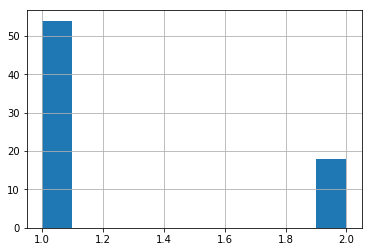

In [29]:
D4AI_list['number_of_meetings'].hist()
plt.show()

In [30]:
emails_all = []
studios_all = []
for row in selected:
    emails = []
    studios = []
    for index in row:
        person = D4AI_list.iloc[index]
        emails.append(person.Email)
        studios.append(person.Studio)
    emails_all.append(emails)
    studios_all.append(studios)

In [31]:
studios_all

[['Cambridge', 'New York', 'San Francisco'],
 ['Shanghai', 'London', 'Munich'],
 ['Palo Alto', 'San Francisco', 'Tokyo'],
 ['Munich', 'Cambridge', 'London'],
 ['Munich', 'Shanghai', 'Tokyo'],
 ['Palo Alto', 'Cambridge', 'San Francisco'],
 ['Cambridge', 'New York', 'Munich'],
 ['London', 'Cambridge', 'Palo Alto'],
 ['Palo Alto', 'Cambridge', 'San Francisco'],
 ['Palo Alto', 'New York', 'San Francisco'],
 ['London', 'Cambridge', 'Palo Alto'],
 ['London', 'Cambridge', 'Munich'],
 ['San Francisco', 'Cambridge', 'London'],
 ['San Francisco', 'Cambridge', 'Palo Alto'],
 ['Cambridge', 'London', 'Munich'],
 ['San Francisco', 'Cambridge', 'Palo Alto'],
 ['San Francisco', 'Cambridge', 'Palo Alto'],
 ['New York', 'Cambridge', 'Munich'],
 ['Munich', 'Shanghai', 'Tokyo'],
 ['Tokyo', 'Shanghai', 'Munich'],
 ['Palo Alto', 'Cambridge', 'San Francisco'],
 ['San Francisco', 'Cambridge', 'Palo Alto'],
 ['London', 'San Francisco', 'Palo Alto'],
 ['Munich', 'Cambridge', 'New York'],
 ['Palo Alto', 'New Yor

In [32]:
emails_all

[['dderuntz@ideo.com', 'labrahamson@ideo.com', 'jpanasik@ideo.com'],
 ['bchien@ideo.com ', 'lcilimingras@ideo.com ', 'aish@ideo.com'],
 ['ekim@ideo.com', 'iprokopoff@ideo.com', 'mpeng@ideo.com'],
 ['dsjunnesson@ideo.com', 'mhendrix@ideo.com', 'bforman@ideo.com'],
 ['aunger@ideo.com ', 'alam@ideo.com', 'dagnelli@ideo.com'],
 ['jstykow@ideo.com', 'pwoodworth@ideo.com ', 'jill@ideo.com'],
 ['sfisher@ideo.com', 'sschulman@ideo.com ', 'mpaeschke@ideo.com'],
 ['jparviainen@ideo.com ', 'jwan@ideo.com', 'dbrenners@ideo.com'],
 ['kathy@ideo.com', 'rhornbuckle@ideo.com', 'hemerson@ideo.com'],
 ['ppantaleoni@ideo.com', 'drhoten@ideo.com', 'bcrosier@ideo.com'],
 ['ssiddall@ideo.com ', 'aholtgraver@ideo.com', 'svergani@ideo.com'],
 ['mcooper@ideo.com ', 'klondergan@ideo.com', 'fblach@ideo.com'],
 ['isabela@ideo.com', 'annkim@ideo.com', 'tbrowne@ideo.com'],
 ['sandy@ideo.com', 'yyungster@ideo.com', 'jmweber@ideo.com'],
 ['aadler@ideo.com', 'dtauber@ideo.com ', 'mpaeschke@ideo.com'],
 ['madison@ideo.